<a href="https://colab.research.google.com/github/ngzhankang/Deep-Learning/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
Submitted by : P1935727 Ng Zhan Kang<br>
Class of DIT/FT/2B/11


---
---

# 1.Setting Up Working Environment In Google Colab

### 1.1 Ensuring 0% Util

---

Ensure that our slot give by Google is not utilized yet.

In [1]:
# to ensure that the current gpu utilization is 0
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=19656f600ca107a7d89671d64d775fae0de8aba82be8e013a166e8c64d102da2
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 111.5 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


### 1.2. Forcing Utils To 0% To Get A Clean Cluster

---

Please do not use this step unless forced to.

In [2]:
# if utilization is > 0, run this code(keep running this cell and the above cell till the util number is 0%):
# NOTE THAT RUNNING THIS MIGHT KILL GPU SESSION AND RESULT IN DATA LOSS(NOT ADVICABLE TO KEEP ON REUSING)
# !kill -9 -1

---
---

# 2.Ensuring GPU Is Utilized In Environment

### 2.1. See the list of available devices

---

This entire section can be omitted if users are not utilizing GPU at all.

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15205261443815312062
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4197976416124481754
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9898495372310649072
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14640891840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12093249886019536840
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
!nvidia-smi

Sat Nov 14 15:54:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W /  70W |    227MiB / 15079MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

---
---

# 3.About The MNIST Dataset (Background Information)

## 3.1. Background
- The MNIST database(Modified National Institute of Standards and Technology database) history came to existence by 
- The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

## 3.2. Classic MNIST Dataset
- For this problem, create a CNN for image classification and evaluate the performance of the network
- Prepare the data and perform necessary feature engineering
- Create **_three models_** 
- Evaluate the models and pick the best candidate
- Form some conclusions

---
---

# 4.Data Importing

### 4.1. Load the libraries

---

Import the necessary libraries.

In [7]:
# Suppress Future Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Tensorflow version=2.3.0
Keras version=2.4.0
Sklearn version=0.22.2.post1
Numpy version=1.18.5
Pandas version=1.1.4
Seaborn version=0.11.0
Matplotlib version=3.2.2
Python version=3.6.9


In [9]:
# start importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop, Adam

from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, History
from tensorflow.keras import losses
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

%matplotlib inline

In [10]:
# fix random seed for reproducibility
np.random.seed(5)

In [11]:
# get the dataset from keras library in tensorflow 2.0
mnist = tf.keras.datasets.mnist

# unpack the dataset to the respective x_train, y_train, x_test and y_test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> MNIST Dataset includes handwritten digits from 0 to 9, and dimensions are 28 by 28 pixels. Each pixels is 8 bits, so its value ranges from to 0 to 255.<p>
</div>

### 4.2. Verify the dataset

---

Verify the credibility of the dataset first by plotting the 1st 25 images from the training set and display the class name below each image.

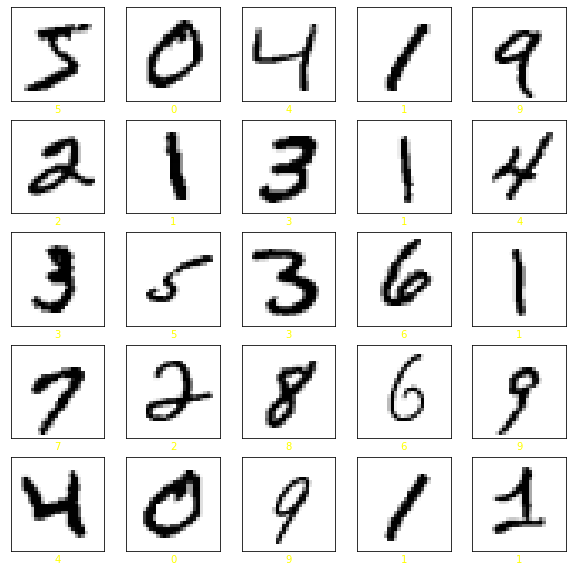

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i], color="yellow")
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> It seems that the labels matches all the images, which is good! Now let's carry on to get a better insight of the datatset we are going to deal with.<p>
</div>

---
---

# 5.Exploratory Data Analysis

### 5.1. Basic Data Exploration

---

Take a peek look at what is inside the `x_train` and the `x_test`.

In [13]:
# take a look at the x_train set first
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [14]:
# take a look at the x_test set
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


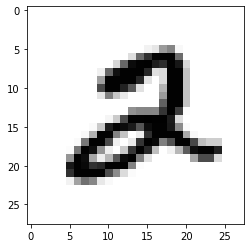

In [15]:
# grab a random picture to take a look
plt.imshow(x_train[5], cmap=plt.cm.binary)
plt.show()

In [16]:
# get the distinct lables that are found in the entire thing
print('Training set unique labels:',np.unique(y_train))
print('Test set unique labels:',np.unique(y_test))

Training set unique labels: [0 1 2 3 4 5 6 7 8 9]
Test set unique labels: [0 1 2 3 4 5 6 7 8 9]


In [17]:
# get the count of the values from 0 to 9
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


Text(0.5, 1.0, 'Pixel Value Distribution')

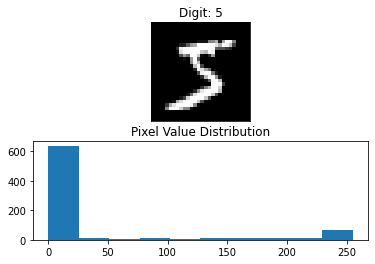

In [18]:
# get the distribution of our pixel values
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])

plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> From what we can see, the pixel values ranges from 0 to 255, with the majority close to 0, and those close to 255 respresenting the digit.<p>
</div>

---
---

# 6.Feature Engineering

### 6.1. Normalize Training Data

---

Normalize the entire training dataset so that there is not much variation.

In [19]:
# attempt to normalize the entire dataset first from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# see the shape of x_train and x_test first
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### 6.2. Changing Dimension To Match Keras Expectation

---

Reshape `x_train` and `x_test` to 4 dimensional array for the convolutional layer later on.

In [20]:
# flatten 28*28 pixel images to 784 pixels for each image(from a 2D array to a 1D array)
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

# see the changes
print('New x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

New x_train shape: (60000, 784)
60000 train samples
10000 test samples


### 6.3. Convert To Categorical Data

---

Convert the labels to categorical data as we do not want the model to think 9 has a higher priority than 0.

In [21]:
# use to_categorical to convert the training and testing dataset labels
num_classes = 10 # number of classes (numbers 0 to 9)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# now lets check again the training and test dataset labels
print('y_train:', y_train[0])
print('y_test:', y_test[0])

y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_test: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


---
---

# 7.Models

### 7.1. Baseline Model

---

First, we will setup a baseline model first using Keras Sequential Model.

In [22]:
# create model and give it a name
model = Sequential(name="sequential_baseline_model")

input_dim = x_train.shape[1]
# add 1st fully connected layer (hidden layer)
model.add(Dense(num_pixels, input_dim=input_dim, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))

# add 2nd fully connected layer (hidden layer)
model.add(Dense(num_pixels, kernel_initializer='uniform', activation=tf.nn.relu))

# add output layer
model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

# model summary
model.summary()

Model: "sequential_baseline_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


In [23]:
# implement a learning rate schedule in keras
learning_rate = 0.001
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-08

adam = Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)

In [24]:
# time to optimise the empty baseline model(an empty shell basically) and fit it with our training dataset
# passing params into the newly created model and compile it
model.compile(optimizer=adam,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# create batch size
batch_size = int(input_dim/100)

# train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=15, batch_size=batch_size, verbose=1)

Epoch 1/15
6858/6858 [==============================] - 21s 3ms/step - loss: 0.2315 - accuracy: 0.9295 - val_loss: 0.1295 - val_accuracy: 0.9630
Epoch 2/15
6858/6858 [==============================] - 21s 3ms/step - loss: 0.1243 - accuracy: 0.9641 - val_loss: 0.1238 - val_accuracy: 0.9666
Epoch 3/15
6858/6858 [==============================] - 21s 3ms/step - loss: 0.1018 - accuracy: 0.9718 - val_loss: 0.1116 - val_accuracy: 0.9711
Epoch 4/15
6858/6858 [==============================] - 21s 3ms/step - loss: 0.0877 - accuracy: 0.9764 - val_loss: 0.1279 - val_accuracy: 0.9728
Epoch 5/15
6858/6858 [==============================] - 21s 3ms/step - loss: 0.0751 - accuracy: 0.9808 - val_loss: 0.1536 - val_accuracy: 0.9677
Epoch 6/15
6858/6858 [==============================] - 21s 3ms/step - loss: 0.0716 - accuracy: 0.9815 - val_loss: 0.1336 - val_accuracy: 0.9738
Epoch 7/15
6858/6858 [==============================] - 21s 3ms/step - loss: 0.0641 - accuracy: 0.9831 - val_loss: 0.1327 - val_ac

In [25]:
#print the available history keys for use
print(history.history.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


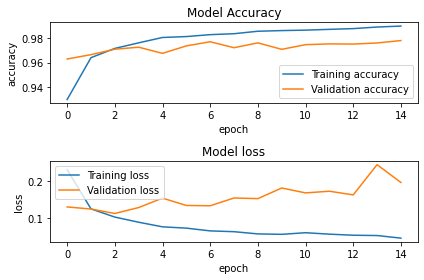

In [32]:
# plotting the accuracy and loss graphs
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='best')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='best')

plt.tight_layout()

### 7.2. CNN Model

---

Next, we will setup a CNN Model.

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We  understand that there are a few main reasons for overfitting in Neural Networks. They are mainly due to the network size, lack of weight regularization and lack of dropouts. In order to reduce (or to  prevent this from happenening), we will implement these 3 main points.<p>
</div>

In [ ]:
# create model and give it a name
model = Sequential(name="cnn_model_sequential")

# add 1st convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), kernel_initializer='he_uniform', activation='relu'))
model.add(MaxPooling2D((2,2))) # add in a maxpooling 2d layer to reduce conputational complexity and overfitting
          
# add 2nd convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2))) # add in a maxpooling 2d layer to reduce conputational complexity and overfitting       

# add flatten layer
model.add(Flatten()) # flatten prev 2d layer output to extract source from image for fully connected layers

# add 1st fully connected layer (hidden layer)
model.add(Dense(128))
model.add(Dropout(0.5)) # add a dropout layer to drop out some neurons during training to prevent overfitting
model.add(Activation('relu')) #dropout before activation function in fully connnect layers

# add 2nd fully connected layer (hidden layer)
model.add(Dense(50))
model.add(Dropout(0.5)) # add a dropout layer to drop out some neurons during training to prevent overfitting
model.add(Activation('relu')) #dropout before activation function in fully connnect layers
          
# add output layer
model.add(Dense(num_classes, activation=tf.nn.softmax)) # output layer(10 neurons as we only have 10 numbers(0 to 9))       
          
# get model summary
model.summary()

In [ ]:
# reshape x_train and x_test to (n_images, x_shape, y_shape, channels)
# we are going to make chanels be 1 as we are not dealing with rgb images.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# examine the shape before we feed it in
print('New x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
# time to optimise the empty CNN model(an empty shell basically) and fit it with our training dataset
# passing params into the newly created model and compile it
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# train the model
history = model.fit(x_train,y_train, validation_split=0.2, epochs=15, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=2)])

In [ ]:
#print the available history keys for use
print(history.history.keys()) 

In [ ]:
# plot a accuracy and validation loss graph to see the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# plot a accuracy and validation accuracy graph to see the training and validation accuracy at each epoch
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 7.3. CNN Hyper-Parameter Tuned Model

---

Next, we will setup a CNN Model that has undergone hyper-parameter tuning.

In [ ]:
# reshape x_train and x_test to (n_images, x_shape, y_shape, channels)
# we are going to make chanels be 1 as we are not dealing with rgb images.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# examine the shape before we feed it in
print('New x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

New x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# perform hyper parameter tuning first

# create model and give it a name
model = Sequential(name="cnn_model_hyperParamTuned_sequential")

# add 1st 1+1+1 convolutional layer
input_shape = (28, 28, 1) # declare input_shape as this is the 1st layer

model.add(Conv2D(32, kernel_size=3, input_shape=input_shape, kernel_initializer='he_uniform', activation='relu'))
# Plot mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
model.add(Conv2D(32, kernel_size=3, kernel_initializer='he_uniform', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', kernel_initializer='he_uniform', activation='relu'))
model.add(BatchNormalization())

# add 2nd 1+1+1 convolutional layer
model.add(Conv2D(64, kernel_size=3, kernel_initializer='he_uniform', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=3, kernel_initializer='he_uniform', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', kernel_initializer='he_uniform', activation='relu'))
model.add(BatchNormalization())

# add flatten layer
model.add(Flatten()) # flatten prev 2d layer output to extract source from image for fully connected layers

# add 1st fully connected layer (hidden layer)
model.add(Dense(128))
model.add(Dropout(0.4)) # add a dropout layer to drop out some neurons during training to prevent overfitting
model.add(Activation('relu')) #dropout before activation function in fully connnect layers

# # add 2nd fully connected layer (hidden layer)
# model.add(Dense(128))
# model.add(Dropout(0.4)) # add a dropout layer to drop out some neurons during training to prevent overfitting
# model.add(Activation('relu')) #dropout before activation function in fully connnect layers

# add output layer
model.add(Dense(num_classes, activation=tf.nn.softmax)) # output layer(10 neurons as we only have 10 numbers(0 to 9)) 

# get the summary of the model
model.summary()

Model: "cnn_model_hyperParamTuned_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_24 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_26 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (

In [ ]:
# passing params into the newly created model and compile it
model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
  
# train the model
history = model.fit(x_train,y_train, validation_split=0.2, batch_size=num_pixels, epochs=15, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=2)])

Epoch 1/15
62/62 [==============================] - 4s 57ms/step - loss: 0.4124 - accuracy: 0.8722 - val_loss: 0.3493 - val_accuracy: 0.8905
Epoch 2/15
62/62 [==============================] - 3s 56ms/step - loss: 0.0664 - accuracy: 0.9801 - val_loss: 0.2765 - val_accuracy: 0.9105
Epoch 3/15
62/62 [==============================] - 3s 55ms/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.1422 - val_accuracy: 0.9575
Epoch 4/15
62/62 [==============================] - 3s 56ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0936 - val_accuracy: 0.9722
Epoch 5/15
62/62 [==============================] - 3s 55ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0639 - val_accuracy: 0.9810
Epoch 6/15
62/62 [==============================] - 3s 55ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0559 - val_accuracy: 0.9843
Epoch 7/15
62/62 [==============================] - 3s 56ms/step - loss: 0.0110 - accuracy: 0.9970 - val_loss: 0.0385 - val_accuracy: 0.9894
Epoch 8/15
62

In [ ]:
#print the available history keys for use
print(history.history.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


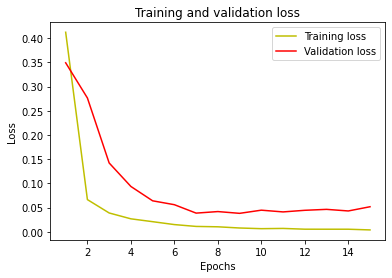

In [ ]:
# plot a accuracy and validation loss graph to see the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

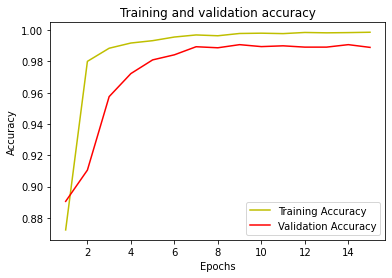

In [ ]:
# plot a accuracy and validation accuracy graph to see the training and validation accuracy at each epoch
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 7.4. CNN Hyper-Parameter Tuned Model

---

A model that somehow worked best among all.

In [ ]:
# Larger CNN Model
import numpy
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers import Activation, BatchNormalization
from tensorflow.python.keras.callbacks import EarlyStopping


from keras.utils import np_utils
from keras import backend as K

# fix random seed for reproducibility
seed = 88
numpy.random.seed(seed)

# get the dataset from keras library in tensorflow 2.0
mnist = tf.keras.datasets.mnist

# unpack the dataset to the respective x_train, y_train, x_test and y_test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# build the model
# create model
model = Sequential()

# add 1st convolutional layer
input_shape = (28, 28, 1) # declare input_shape as this is the 1st layer
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, kernel_initializer='he_uniform', activation='relu'))
model.add(MaxPooling2D((2,2))) # add in a maxpooling 2d layer to reduce conputational complexity and overfitting
model.add(BatchNormalization())
          
# add 2nd convolutional layer
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2))) # add in a maxpooling 2d layer to reduce conputational complexity and overfitting      
model.add(BatchNormalization())

# add 3rd convolutional layer
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2))) # add in a maxpooling 2d layer to reduce conputational complexity and overfitting      
model.add(BatchNormalization())
          
# add flatten layer
model.add(Flatten()) # flatten prev 2d layer output to extract source from image for fully connected layers

# add 1st fully connected layer (hidden layer)
model.add(Dense(128))
model.add(Dropout(0.2)) # add a dropout layer to drop out some neurons during training to prevent overfitting
model.add(Activation('relu')) #dropout before activation function in fully connnect layers

# add 2nd fully connected layer (hidden layer)
model.add(Dense(64))
model.add(Dropout(0.2)) # add a dropout layer to drop out some neurons during training to prevent overfitting
model.add(Activation('relu')) #dropout before activation function in fully connnect layers     

# # add 3rd fully connected layer (hidden layer)
# model.add(Dense(64))
# model.add(Dropout(0.5)) # add a dropout layer to drop out some neurons during training to prevent overfitting
# model.add(Activation('relu')) #dropout before activation function in fully connnect layers

# add output layer
model.add(Dense(num_classes, activation=tf.nn.softmax)) # output layer(10 neurons as we only have 10 numbers(0 to 9)) 

# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train,y_train, validation_split=0.2, epochs=15, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=1)])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

---
---

# 8.Test Accuracy, Loss And Results

### 8.1. Baseline Model Result

---

Get the result for the baseline model.

In [33]:
# now we shall evaluate the model and see the accuracy
loss, accuracy = model.evaluate(x_test,y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Baseline Model Accuracy: %.2f%%" % (accuracy*100))
print("Baseline Model Error: %.2f%%" % (100-loss*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1903 - accuracy: 0.9791
Test loss: 0.19027702510356903
Test accuracy: 0.9790999889373779
Baseline Model Accuracy: 97.91%
Baseline Model Error: 80.97%


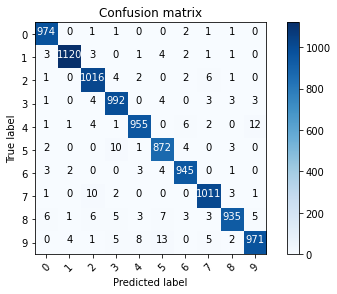

In [34]:
# plot our confusion matrix here to see how many labels got misplaced
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 


30651  classified correctly
69349  classified incorrectly


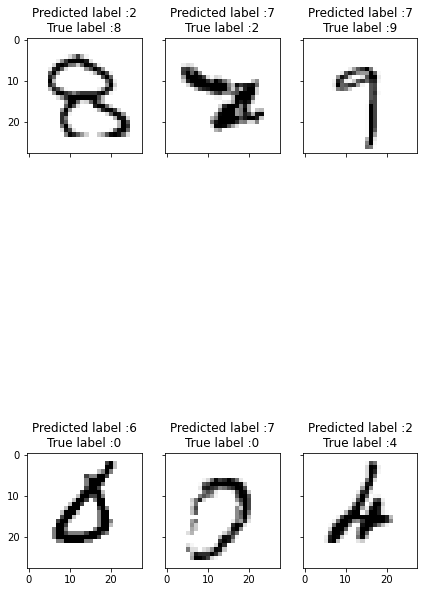

In [42]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

# see which we predicted correctly and which not
correct_indices = np.nonzero(Y_pred == y_test)[0]
incorrect_indices = np.nonzero(Y_pred != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap=plt.cm.binary)
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

### 8.2. CNN Model Result

---

Get the result for the CNN model.

In [ ]:
# now we shall evaluate the model and see the accuracy
score = model.evaluate(x_test,y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("CNN Model Error: %.2f%%" % (100-score[1]*100))

In [ ]:
# from the above result, we can see that we got an accuracy of 96.7% and a loss of 10.7%, which is not bad but can be better improved.
# now we shall try to make individual predictions.

# get a random index which we will use it to see what number it is from the test dataset(it shld be a number all the way to 60,000)
image_index = 8

# see what image it is first
plt.imshow(x_test[image_index].reshape(28, 28),cmap=plt.cm.binary) # visually, we identify the number as 6
# see the actual label
actual_label = (y_test[image_index])
print('Actual Label:', actual_label)

# now lets try to feed the image_index into x_test and feed it into the trained model
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Predicted Number:', pred.argmax()) # print out the result

### 8.3. CNN Hyper-Parameter Tuned Model Result

---

Get the result for the CNN model that has undergone hyper parameter tuning.

In [ ]:
# now we shall evaluate the model and see the accuracy
loss, accuracy = model.evaluate(x_test,y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("CNN Model Accuracy: %.2f%%" % (accuracy*100))
print("CNN Model Error: %.2f%%" % (100-loss*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0396 - accuracy: 0.9889
Test loss: 0.039604440331459045
Test accuracy: 0.9889000058174133
CNN Model Accuracy: 98.89%
CNN Model Loss: 3.96%


Actual Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted Number: 5


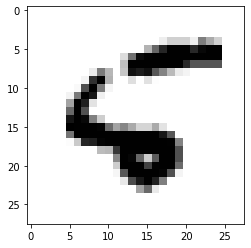

In [ ]:
# from the above result, we can see that we got an accuracy of 96.7% and a loss of 10.7%, which is not bad but can be better improved.
# now we shall try to make individual predictions.

# get a random index which we will use it to see what number it is from the test dataset(it shld be a number all the way to 60,000)
image_index = 8

# see what image it is first
plt.imshow(x_test[image_index].reshape(28, 28),cmap=plt.cm.binary) # visually, we identify the number as 6
# see the actual label
actual_label = (y_test[image_index])
print('Actual Label:', actual_label)

# now lets try to feed the image_index into x_test and feed it into the trained model
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Predicted Number:', pred.argmax()) # print out the result

---
---

# 9.References

## Using Google Colab More Efficiently
- [Getting the Most Out of Your Google Colab (Tutorial)](https://medium.com/@oribarel/getting-the-most-out-of-your-google-colab-2b0585f82403)
- [Using Google Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

## Background Research

## Selecting CNN Architecture
- [Top 10 CNN Architecture](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d#676b)
- [AlexNet: The Architecture that Challenged CNNs](https://towardsdatascience.com/alexnet-the-architecture-that-challenged-cnns-e406d5297951)
- [How to choose CNN Architecture MNIST](https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist#What-is-the-best-CNN-architecture-for-MNIST?)

## Some Tutorials on how to build a CNN Model
- [Building a Custom Convolutional Neural Network in Keras](https://medium.com/@ODSC/building-a-custom-convolutional-neural-network-in-keras-48171163aa7f)
- [The Most Intuitive and Easiest Guide for Convolutional Neural Network](https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480)
- [MNIST with Keras for Beginners(.99457)](https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457)
- [Introduction to CNN Keras - Acc 0.997 (top 8%)](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)
- [Image Classification in 10 Minutes with MNIST Dataset](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d)
- [How to Develop a CNN for MNIST Handwritten Digit Classification](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/#:~:text=The%20MNIST%20dataset%20is%20an,digits%20between%200%20and%209.)
- [MNIST Handwritten Digit Recognition in Keras](https://nextjournal.com/gkoehler/digit-recognition-with-keras)

## Feature Engineering
- [Why Change Data Dimension Before Feeding Into Keras?](https://stackoverflow.com/a/62991238/12347869)
- [Properly Setting the Random Seed in ML Experiments. Not as Simple as You Might Imagine](https://medium.com/@ODSC/properly-setting-the-random-seed-in-ml-experiments-not-as-simple-as-you-might-imagine-219969c84752)
- [How to get reproducible results in keras](https://stackoverflow.com/questions/32419510/how-to-get-reproducible-results-in-keras)
- [How can I obtain reproducible results using Keras during development?](https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development)

## Building Layers
- [What is the default weight initializer in Keras?](https://stackoverflow.com/questions/54011173/what-is-the-default-weight-initializer-in-keras)
- [A Gentle Introduction to Pooling Layers for Convolutional Neural Networks](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/)
- [Using the Keras Flatten Operation in CNN Models with Code Examples](https://missinglink.ai/guides/keras/using-keras-flatten-operation-cnn-models-code-examples/)
- [Dropout Neural Network Layer In Keras Explained](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)
- [Changing shape of MNIST for tensorflow CNN](https://stackoverflow.com/questions/50549859/changing-shape-of-mnist-for-tensorflow-cnn)

## Model Evaluation 
- [Sparse_categorical_crossentropy vs categorical_crossentropy (keras, accuracy)](https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy)

## Hyper Parameter Tuning With Keras Tuner
- [Hyperparameter tuning with Keras Tuner](https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html)
- [Why is random search better than grid search for machine learning?](https://analyticsindiamag.com/why-is-random-search-better-than-grid-search-for-machine-learning/#:~:text=Random%20search%20is%20a%20technique,to%20yield%20better%20results%20comparatively.)
- [Hands on hyperparameter tuning with Keras Tuner](https://www.sicara.ai/blog/hyperparameter-tuning-keras-tuner)
- [Keras Tuner Docs](https://keras-team.github.io/keras-tuner/)
- [How do you decide the parameters of a Convolutional Neural Network for image classification?](https://stackoverflow.com/questions/24509921/how-do-you-decide-the-parameters-of-a-convolutional-neural-network-for-image-cla#:~:text=The%20Number%20of%20convolutional%20layers,you%20need%20to%20decide%20whether)
